## Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Loading the dataset

In [2]:
data=pd.read_csv(r"C:\Users\HP\Downloads\titanic_dataset (3).csv")

In [3]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Analysis

In [4]:
data.shape

(891, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
data.isnull().sum()                  #Checking for null values.

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

INFERENCE:Null values are present.

In [9]:
data.nunique()                  #Checking cardinality of the data.

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

INFERENCE:PassengerId,Name and Ticket has relatively less important.So dropping these columns.

In [10]:
data=data.drop(['PassengerId','Name','Ticket'],axis=1)

## Numerical Features

In [11]:
numerical_features=[feature for feature in data.columns if data[feature].dtypes != 'O']
data[numerical_features].head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


INFERENCE:There are 6 numerical features in the dataset.

### Discrete Features

In [12]:
discrete_features = [feature for feature in numerical_features if len(data[feature].unique())<25 ]
data[discrete_features].head()

,Survived,Pclass,SibSp,Parch
0,0,3,1,0
1,1,1,1,0
2,1,3,0,0
3,1,1,1,0
4,0,3,0,0


INFERENCE:There are 4 discrete features in numerical features.

### Continous Features

In [13]:
continous_features = [feature for feature in numerical_features if feature not in discrete_features]
data[continous_features].head()

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


INFERENCE:There are 2 continuous features in numerical features

## Categorical Features

In [14]:
categorical_features = [feature for feature in data.columns if data[feature].dtypes == 'O']
data[categorical_features].head()

,Sex,Cabin,Embarked
0,male,NaN,S
1,female,C85,C
2,female,NaN,S
3,female,C123,S
4,male,NaN,S


INFERENCE:There are 3 categorical features.

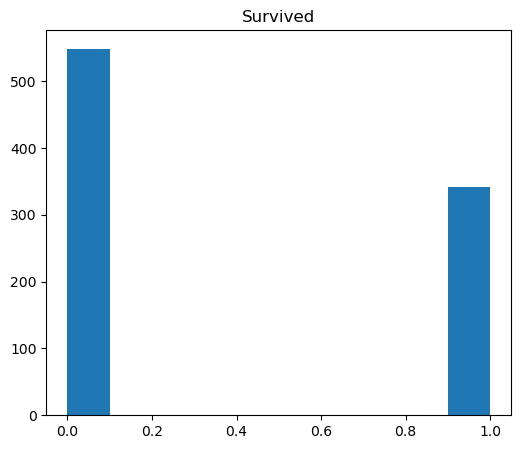

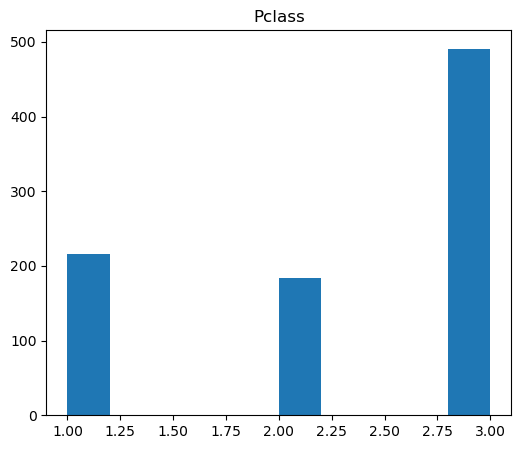

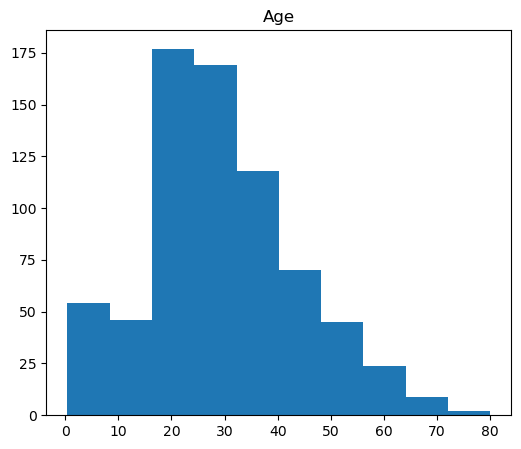

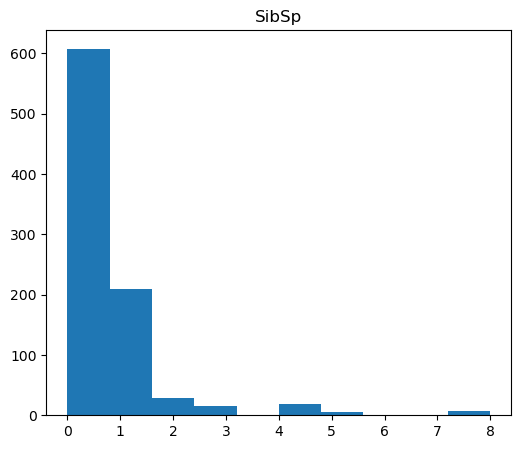

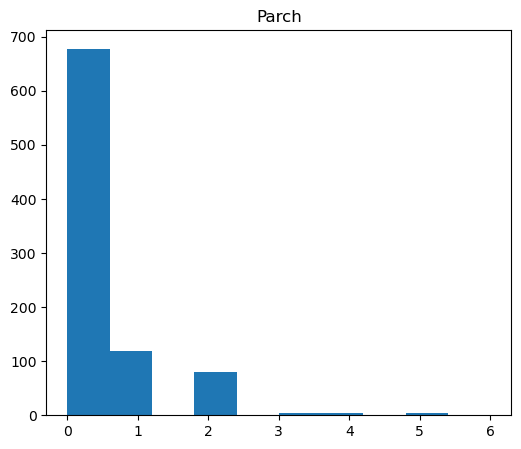

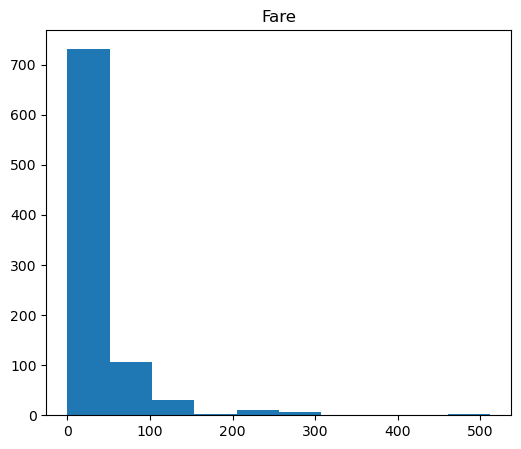

In [15]:
for feature in numerical_features:            #Checking the distribution of numerical features.
    
    plt.figure(figsize=(6,5))
    plt.hist(data[feature])
    plt.title(feature)

INFERENCE:Numerical features doesn't follow Normal distribution.

NULL values of Age can fill with median of Age column and embarked column can fill with mode of that column.

Cabin column can filled with value "unknown".

In [16]:
data['Age']=data['Age'].fillna(data['Age'].median())                           #filling of the missing values 
data['Embarked']=data['Embarked'].fillna(data['Embarked'].mode()[0])
data['Cabin']=data['Cabin'].fillna(data['Cabin']=='unknown')                           

In [17]:
#dropping the 'cabin'column

data.drop('Cabin',axis=1,inplace=True)

### LABEL ENCODING

In [18]:
# Here Sex and embarked columns contains categorical data.so we have to encode it.for that we use label encoding

cols=['Sex','Embarked']

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in cols:
    data[col]=le.fit_transform(data[col])

In [19]:
data.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [20]:
#Splitting the data

X=data.drop('Survived',axis=1)
y=data['Survived']

### Scaling

In [21]:
#MIN-Max scaling done on age and fare column.

X1=X.drop(['Pclass','Sex','SibSp','Parch','Embarked'],axis=1)
X1

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500
...,...,...
886,27.0,13.0000
887,19.0,30.0000
888,28.0,23.4500
889,26.0,30.0000


In [22]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler= MinMaxScaler(feature_range=(0,1))

X1= min_max_scaler.fit_transform(X1)

In [23]:
type(X1)

numpy.ndarray

In [24]:
#converting array into dataframe

X1= pd.DataFrame(X1, columns=['Age','Fare']) 

In [25]:
X.drop(['Age','Fare'],axis=1,inplace=True)
X

,Pclass,Sex,SibSp,Parch,Embarked
0,3,1,1,0,2
1,1,0,1,0,0
2,3,0,0,0,2
3,1,0,1,0,2
4,3,1,0,0,2
...,...,...,...,...,...
886,2,1,0,0,2
887,1,0,0,0,2
888,3,0,1,2,2
889,1,1,0,0,0


In [26]:
X=pd.concat([X,X1],axis=1)

In [27]:
X

,Pclass,Sex,SibSp,Parch,Embarked,Age,Fare
0,3,1,1,0,2,0.271174,0.014151
1,1,0,1,0,0,0.472229,0.139136
2,3,0,0,0,2,0.321438,0.015469
3,1,0,1,0,2,0.434531,0.103644
4,3,1,0,0,2,0.434531,0.015713
...,...,...,...,...,...,...,...
886,2,1,0,0,2,0.334004,0.025374
887,1,0,0,0,2,0.233476,0.058556
888,3,0,1,2,2,0.346569,0.045771
889,1,1,0,0,0,0.321438,0.058556


In [28]:
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

### KNN Model

In [29]:
# importing libraries for KNN model

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

#model creation
metric_k=[]
neighbors= range(3,15)

for k in neighbors:
    classifier= KNeighborsClassifier(n_neighbors=k)
    classifier= classifier.fit(X_train,y_train)
    y_pred_kNN= classifier.predict(X_test)
    acc=accuracy_score(y_test,y_pred_kNN)
    metric_k.append(acc)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

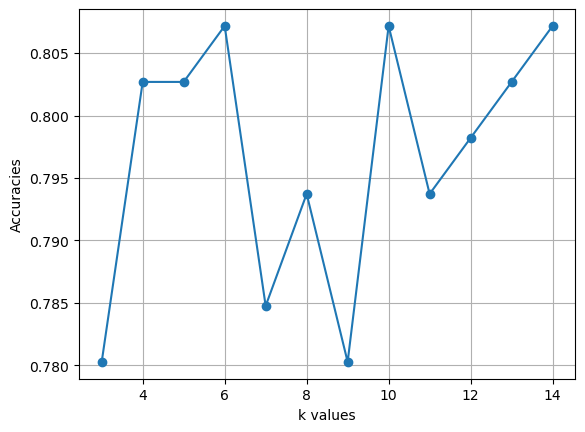

In [30]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k values')
plt.ylabel('Accuracies')
plt.grid()

In [31]:
# Instantiate learning model
classifier= KNeighborsClassifier(n_neighbors=5)
# Fitting the model
classifier= classifier.fit(X_train,y_train)

## K-fold Cross Validation for KNN model

In [32]:
# Importing libraries 
from sklearn.model_selection import KFold

kfold_validator=KFold(10)

for train_index,test_index in kfold_validator.split(X,y):
    print('Training Index:',train_index)
    print('Test Index:',test_index)

Training Index: [ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 33

In [33]:
# Importing libraries 
from sklearn.model_selection import cross_val_score

cv_result=cross_val_score(classifier,X,y,cv=kfold_validator)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

In [34]:
cv_result

array([0.73333333, 0.7752809 , 0.75280899, 0.78651685, 0.84269663,
       0.82022472, 0.82022472, 0.75280899, 0.85393258, 0.75280899])

In [35]:
np.mean(cv_result)             #average accuracy score

0.789063670411985

## Stratified K-Fold Cross Validation for KNN Model

In [36]:
# Importing libraries 
from sklearn.model_selection import StratifiedKFold

skfold_validator=StratifiedKFold(n_splits=10 )

for train_index,test_index in skfold_validator.split(X,y):
    print('Training Index:',train_index)
    print('Test Index:',test_index)

Training Index: [ 82  84  85  88  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 33

In [37]:
skcv_result=cross_val_score(classifier,X,y,cv=skfold_validator)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

In [38]:
skcv_result

array([0.73333333, 0.78651685, 0.71910112, 0.79775281, 0.86516854,
       0.80898876, 0.84269663, 0.76404494, 0.82022472, 0.76404494])

In [39]:
np.mean(skcv_result)               #average accuracy score

0.7901872659176029

## Support Vector Machine Model

In [40]:
# Importing libraries for SVM model
from sklearn.svm import SVC

# Instantiate learning model
svm_clf2=SVC(kernel='rbf')
# Fitting the model
svm_clf2=svm_clf2.fit(X_train,y_train)

## K-Fold Cross Validation for SVM

In [41]:
kfold_validator=KFold(10)

for train_index,test_index in kfold_validator.split(X,y):
    print('Training Index:',train_index)
    print('Test Index:',test_index)

Training Index: [ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 33

In [42]:
cv_result=cross_val_score(svm_clf2,X,y,cv=kfold_validator)

In [43]:
cv_result

array([0.78888889, 0.84269663, 0.76404494, 0.85393258, 0.79775281,
       0.80898876, 0.78651685, 0.7752809 , 0.85393258, 0.79775281])

In [44]:
np.mean(cv_result)                  #average accuracy score

0.8069787765293384

## Stratified K-Fold Cross Validation for SVM

In [45]:
skfold_validator=StratifiedKFold(n_splits=10)

for train_index,test_index in skfold_validator.split(X,y):
    print('Training Index:',train_index)
    print('Test Index:',test_index)

Training Index: [ 82  84  85  88  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 33

In [46]:
skcv_result=cross_val_score(svm_clf2,X,y,cv=skfold_validator)

In [47]:
skcv_result

array([0.8       , 0.82022472, 0.7752809 , 0.85393258, 0.83146067,
       0.78651685, 0.80898876, 0.78651685, 0.82022472, 0.79775281])

In [48]:
np.mean(skcv_result)                       #average accuracy score

0.8080898876404493

### For KNN Model, K-Fold Cross Validation Score is 0.789063670411985 and Stratified K-Fold Cross Validation score is 0.7901872659176029

### For SVM Model,K-Fold Cross Validation Score is 0.8069787765293384 and Stratified K-Fold Cross Validation score is 0.8080898876404493